## Notebook for "Investigating the Learing Rate with Haptic Actuators in Mixed Reality short"

In [638]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, ttest_ind, ttest_rel


# Helper functions
To calculate the error between two piano sequences we use dynamic time warping

In [639]:
def dtw(s, t, dist):
    """
    input:
        s, t: a series of data points
        dist: distance function
    output:
        d: the distance between s and t
    """
    n, m = len(s), len(t)
    dtw_matrix = np.zeros((n+1, m+1))
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = dist(s[i-1], t[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix[-1,-1]

To apply dynamic time warping to a sequence of keys we need to define the distance between two keys, because piano keys do not have a canonical distance.

Applying dynamic time warping to calculate an error on the rhythm of a piano sequence we do not need to define our own distance, because the rhythm is measured in seconds.

In [640]:
def distance_piano_keys(key, otherKey):
    return 0 if key == otherKey else 1

Here is an example applying dynamic time warping to calculate the error between two piano sequences.

In [641]:

# create list of characters
original_keys_sequence = ['C', 'D', 'E', 'C', 'G', 'F', 'D', 'D', 'F', 'E', 'C']
performed_keys_sequence = ['C', 'E', 'E', 'C',  'F', 'D', 'D','C', 'F', 'E', 'C']

# call dtw
distance = dtw(original_keys_sequence, performed_keys_sequence, dist=distance_piano_keys)
distance


3.0

In [642]:
#get list of files in directory
def get_json_file_list(dir_path):
    import os
    file_list = []
    for root, dirs, files in os.walk(dir_path):
        for file in files:
            if file.endswith(".json"):
                file_list.append(os.path.join(root, file))
    return file_list

# parse json file
def parse_json_file(file_path):
    import json
    with open(file_path) as json_file:
        json_data = json.load(json_file)
    return json_data

def map_test_tries(json_data_try, func):
    return list(map(func, json_data_try['testTries']))

def map_press_sequence(json_data_press_sequence, func):
    return list(map(func, json_data_press_sequence['pressSequence']))

def extract_name_of_key(json_data_press):
    return json_data_press['nameOfKey']

def extract_seconds_from_previous_key_press(json_data_press):
    return json_data_press['secondsFromPreviousKeyPress']

def insert_into_dictionary(dictionary, key, to_insert):
    dictionary[key] = to_insert
    return dictionary

In [643]:
def birthday_to_age(birthdays_data_frame):
    year_to_subtract = (birthdays_data_frame['reference'].month, birthdays_data_frame['reference'].day) < (birthdays_data_frame['born'].month, birthdays_data_frame['born'].day)
    years = birthdays_data_frame['reference'].year - birthdays_data_frame['born'].year
    return  years - (year_to_subtract)

In [644]:
def explorative_statistic_for_t_test(dataframe, dependent_variable):
    width = 0.35
    # Creating plot
    fig, ax = plt.subplots()
    fig.patch.set_alpha(0.0)
    fig.patch.set_facecolor('orange')
   
    ax.patch.set_alpha(0.0)
    fig.patch.set_facecolor('blue')
    boxplotprops = dict(color='white')
    accentprops = dict(color='#009682')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(colors='white')
    ax.spines['left'].set_color('white')    
    ax.spines['top'].set_color('white') 
    ax.spines['right'].set_color('white')    
    ax.spines['bottom'].set_color('white')
    #plt.boxplot(dataframe.loc[dataframe['Treatment Participant Received']=='Holographic haptics',dependent_variable], widths=width, labels=['Holographic haptics'], whiskerprops=boxplotprops, capprops=boxplotprops,flierprops=boxplotprops,boxprops=boxplotprops, medianprops=accentprops )
    #plt.boxplot(dataframe.loc[dataframe['Treatment Participant Received']=='Holographic visual only',dependent_variable], widths=width, positions=[width], labels=['Holographic visual only'], whiskerprops=boxplotprops, capprops=boxplotprops,flierprops=boxplotprops,boxprops=boxplotprops, medianprops=accentprops)
    plt.boxplot(dataframe.loc[dataframe['Treatment Participant Received']=='Holographic haptics',dependent_variable], widths=width,labels=[''],whiskerprops=boxplotprops, capprops=boxplotprops,flierprops=boxplotprops,boxprops=boxplotprops, medianprops=accentprops )
    plt.boxplot(dataframe.loc[dataframe['Treatment Participant Received']=='Holographic visual only',dependent_variable], widths=width,labels=[''], positions=[width],  whiskerprops=boxplotprops, capprops=boxplotprops,flierprops=boxplotprops,boxprops=boxplotprops, medianprops=accentprops)
    

    #plt.ylabel(dependent_variable)
    # show plot
    plt.show()  

    print(shapiro(dataframe_with_results.loc[dataframe_with_results['Treatment Participant Received']=='Holographic haptics',dependent_variable]))

    print(shapiro(dataframe_with_results.loc[dataframe_with_results['Treatment Participant Received']=='Holographic visual only',dependent_variable]))

    print(levene(dataframe_with_results.loc[dataframe_with_results['Treatment Participant Received']=='Holographic haptics',dependent_variable],dataframe_with_results.loc[dataframe_with_results['Treatment Participant Received']=='Holographic visual only',dependent_variable], center='mean'))
    

In [645]:
# adopted from https://towardsdatascience.com/stacked-bar-charts-with-pythons-matplotlib-f4020e4eb4a7
def plot_stackedbar_chart(df, labels, colors):
    fields = df.columns.tolist()
    
    
    fig, ax = plt.subplots(1)
    fig.patch.set_alpha(1)

    left = len(df) * [0]
    
    for idx, name in enumerate(fields):
        val= df[name]
        plt.barh(df.index, val, left = left, color=colors[idx], hatch=hatches[idx] )
        left = left + val

    plt.legend(labels, ncol=5, loc='center', bbox_to_anchor=(0.2,-0.2), fontsize="large")

    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    xticks = np.arange(0,1.1,0.1)
    xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
    plt.xticks(xticks, xlabels)

    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed')

# Define Reference Piano Sequence
In this study we collect data on the learning rate of 'Ode To Joy' by Beethoven.
Hence, we define the sequence of keys and the rhythm of the piano sequence.

In [646]:
ode_to_joy_key_sequence = ['E','E','F','G','G','F','E','D','C','C','D','E','E','D','D','E','E','F','G','G','F','E','D','C','C','D','E','D','C','C']


beatPerMinute = 60
quarter = 1 / 4
speed = 60 / quarter / beatPerMinute
quarterNoteDurationSeconds = (1 / 4) * speed
threeEighthNoteDurationSeconds = (3 / 8) * speed
eighthNoteDurationSeconds = (1 / 8) * speed
halfNoteDurationSeconds = (1 / 2) * speed


ode_to_joy_time_in_seconds_between_key_presses = [0, quarterNoteDurationSeconds,quarterNoteDurationSeconds,quarterNoteDurationSeconds,quarterNoteDurationSeconds,quarterNoteDurationSeconds,quarterNoteDurationSeconds,quarterNoteDurationSeconds,quarterNoteDurationSeconds,quarterNoteDurationSeconds,quarterNoteDurationSeconds,quarterNoteDurationSeconds,quarterNoteDurationSeconds,threeEighthNoteDurationSeconds, eighthNoteDurationSeconds,
halfNoteDurationSeconds,quarterNoteDurationSeconds,quarterNoteDurationSeconds,quarterNoteDurationSeconds,quarterNoteDurationSeconds,quarterNoteDurationSeconds,quarterNoteDurationSeconds,quarterNoteDurationSeconds,quarterNoteDurationSeconds,quarterNoteDurationSeconds,quarterNoteDurationSeconds,quarterNoteDurationSeconds,quarterNoteDurationSeconds, threeEighthNoteDurationSeconds, eighthNoteDurationSeconds]


# Data Ingestion
Recording ot the pre-test and post-test for a participant are each stored in a json file
The answers of all participants to the questionnaire are stored in a csv file.

Hence, we need to load the data and transform it  so that we can analyse it.

In [647]:
path_to_json_files = "..\\study-results"
list_of_json_files = get_json_file_list(path_to_json_files)

parsed_json_files = list(map(parse_json_file, list_of_json_files))


pressed_keys = list(map(lambda result_of_one_recording_session: map_test_tries(result_of_one_recording_session, lambda test_try: map_press_sequence(test_try, extract_name_of_key)), parsed_json_files))

distances_keys = map(lambda pressed_keys_one_session_array: np.min(list(map(lambda pressed_keys_one_try_array:dtw(ode_to_joy_key_sequence, pressed_keys_one_try_array, distance_piano_keys) ,pressed_keys_one_session_array))),pressed_keys)
parsed_json_with_distance = zip(distances_keys, parsed_json_files)
parsed_json_with_distance = list(map(lambda input_with_distance: insert_into_dictionary(input_with_distance[1],"dtw_distance_keys_ode_to_joy", input_with_distance[0]), parsed_json_with_distance))


In [648]:
rhythm_seconds = list(map(lambda result_of_one_recording_session: map_test_tries(result_of_one_recording_session, lambda test_try: map_press_sequence(test_try, extract_seconds_from_previous_key_press)), parsed_json_files))
distances_seconds_between_keys = map(lambda seconds_between_presses_one_session_array: np.min(list(map(lambda seconds_between_presses_one_try_array:dtw(ode_to_joy_time_in_seconds_between_key_presses, seconds_between_presses_one_try_array, lambda x, y: np.abs(x - y)) ,seconds_between_presses_one_session_array))),rhythm_seconds)
parsed_json_with_distance_rhythm = list(zip(distances_seconds_between_keys, parsed_json_files))
distances_data_frame_rhythm = pd.DataFrame(map(lambda json_entry: {'test_id_rhythm_pre': json_entry[1]['id'], 'dtw_distance_rhythm_ode_to_joy_pre': json_entry[0]} , parsed_json_with_distance_rhythm))



In [649]:


csv_file_url =  "..\\study-results\\piano study questionnaire.csv"


questionnaire_data_frame = pd.read_csv(csv_file_url)

In [650]:
distances_data_frame = pd.DataFrame(map(lambda json_entry: {'test_id_post': json_entry['id'], 'dtw_distance_keys_ode_to_joy_post': json_entry["dtw_distance_keys_ode_to_joy"]} , parsed_json_with_distance))
distances_data_frame['dtw_distance_keys_ode_to_joy_post'] = distances_data_frame['dtw_distance_keys_ode_to_joy_post'].replace(np.inf, 30)


dataframe_with_results = questionnaire_data_frame.merge(distances_data_frame,left_on="Post Test Piano Results Id", right_on="test_id_post")

distances_data_frame.columns = ['test_id_pre', 'dtw_distance_keys_ode_to_joy_pre']
dataframe_with_results = dataframe_with_results.merge(distances_data_frame,left_on="Pre Test Piano Results Id", right_on="test_id_pre")

In [651]:
distance_if_infinity = np.sum(ode_to_joy_time_in_seconds_between_key_presses)
distances_data_frame_rhythm['dtw_distance_rhythm_ode_to_joy_pre'] = distances_data_frame_rhythm['dtw_distance_rhythm_ode_to_joy_pre'].replace(np.inf, distance_if_infinity )
dataframe_with_results = dataframe_with_results.merge(distances_data_frame_rhythm,left_on="Pre Test Piano Results Id", right_on="test_id_rhythm_pre")
distances_data_frame_rhythm.columns = ['test_id_rhythm_post', 'dtw_distance_rhythm_ode_to_joy_post']
dataframe_with_results = dataframe_with_results.merge(distances_data_frame_rhythm,left_on="Post Test Piano Results Id", right_on="test_id_rhythm_post")



In [652]:


    
birthdays_data_frame = pd.DataFrame(columns=['reference', 'born'])
dataframe_with_results['born'] = pd.to_datetime(dataframe_with_results['Wann wurden Sie geboren?'])
dataframe_with_results['reference'] = pd.to_datetime(dataframe_with_results['Completion time'])

dataframe_with_results['age']=(dataframe_with_results.apply(birthday_to_age, axis=1))


In [653]:
dataframe_with_results['piano_experience_years'] = dataframe_with_results['Wie viele Jahre haben Sie Klavier gespielt?'].replace('nie', 0).replace('keine', 0).astype(int)


In [654]:
dataframe_with_results['knows_ode_to_joy'] = dataframe_with_results['Haben Sie zuvor Beethoven: Ode an die Freude gehört?'].replace('Ja', 'Yes').replace('Nein', 'No')


Calculate NASA TLX

In [655]:
tlx_weight_questions_df = dataframe_with_results[dataframe_with_results.columns[pd.Series(dataframe_with_results.columns).str.startswith('Wählen Sie den Aspekt, der für Sie den jeweils wichtigeren Beitrag zur Arbeitsbelastung hinsichtlich der Aufgabe darstellt.')]]
categories_nasa_tlx = ["Anstrengung",	"Frustration"	,"Geistige Anforderung",	"Körperliche Anforderung","Leistung",	"Zeitliche Anforderung"]

nasa_tlx_dimension_scores = dataframe_with_results[categories_nasa_tlx].replace('100 (Hoch)', 100).replace("5 (Gering)",5).replace("100 (Schlecht)",100).astype(float)
raw_weights = tlx_weight_questions_df.T.apply(pd.value_counts).fillna(0)
nasa_tlx_weights = (raw_weights/15).T
dataframe_with_results["NASA TLX score"] = (nasa_tlx_dimension_scores * nasa_tlx_weights).sum(axis=1)

Transform answers to subjective questionnaire

In [656]:
subjective_questions_data_frame = pd.DataFrame(columns=['trifft nicht zu','trifft eher nicht zu','teils-teils','trifft eher zu','trifft zu'])
subjective_question_titles = ['Die 30 Minuten haben geholfen Piano zu lernen.', 'Es hat Spaß gemacht auf diese Art zu lernen.','Es war schwer eine Taste auf dem Klavier zu drücken ohne eine andere Taste zu drücken.', 'Ich kann mir vorstellen langfristig Klavier auf diese Weise zu lernen.', 'Es war leicht die Reihenfolge der Tasten für das Lied zu lernen.','Es war schwer den Rythmus des Liedes zu lernen.']
subjective_question_titles_en = ['learn session helpful to learn piano', 'learning session was fun', 'accurately pressing piano key is difficult', 'can imagine it for long term piano learning', 'difficult to learn the rhythm of the song', 'difficult to learn the structure of the song']
for question_title in subjective_question_titles:
    learn_session_helpful_counts = dataframe_with_results[question_title].groupby(dataframe_with_results[question_title]).count()
    learn_session_helpful_counts = learn_session_helpful_counts / learn_session_helpful_counts.sum()
    subjective_questions_data_frame= subjective_questions_data_frame.append(learn_session_helpful_counts)

likert_en = ['strongly disagree', 'disagree', 'neutral', 'agree', 'strongly agree']
subjective_questions_data_frame.columns = likert_en
subjective_questions_data_frame.index = subjective_question_titles_en
subjective_questions_data_frame.fillna(0, inplace=True)
subjective_questions_data_frame

,strongly disagree,disagree,neutral,agree,strongly agree
learn session helpful to learn piano,0.0625,0.3125,0.0000,0.3750,0.2500
learning session was fun,0.1250,0.0000,0.2500,0.1875,0.4375
accurately pressing piano key is difficult,0.0000,0.0000,0.3125,0.0625,0.6250
can imagine it for long term piano learning,0.0625,0.3125,0.1875,0.3750,0.0625
difficult to learn the rhythm of the song,0.1875,0.1250,0.1875,0.3125,0.1875
difficult to learn the structure of the song,0.1250,0.2500,0.1875,0.1875,0.2500


# Explore the sample of the study

Männlich    9
Weiblich    7
Name: Was ist Ihr Geschlecht, dtype: int64


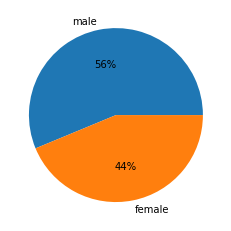

In [657]:


print(dataframe_with_results['Was ist Ihr Geschlecht'].value_counts())
plt.pie(dataframe_with_results['Was ist Ihr Geschlecht'].value_counts(), labels=['male', 'female'],autopct='%1.0f%%')
plt.show()

Rechtshändig    14
Linkshändig      2
Name: Was ist Ihre Händigkeit?, dtype: int64


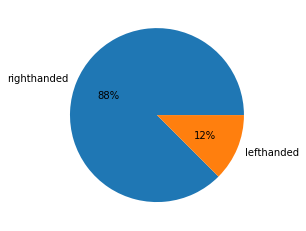

In [658]:
print(dataframe_with_results['Was ist Ihre Händigkeit?'].value_counts())
plt.pie(dataframe_with_results['Was ist Ihre Händigkeit?'].value_counts(), labels=['righthanded', 'lefthanded'],autopct='%1.0f%%')
plt.show()

In [659]:
print("min age: %d"%(dataframe_with_results['age'].min()))
print("median age: %d"%dataframe_with_results['age'].median())
print("mean age: %d"%dataframe_with_results['age'].mean())
print("max age: %d"%(dataframe_with_results['age'].max()))

min age: 18
median age: 27
mean age: 34
max age: 56


Nein    12
Ja       4
Name: Haben Sie zuvor ein mixed reality Gerät benutzt?, dtype: int64


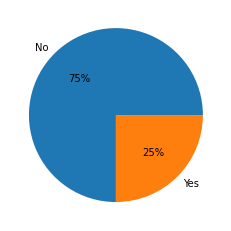

In [660]:
print(dataframe_with_results['Haben Sie zuvor ein mixed reality Gerät benutzt?'].value_counts())
plt.pie(dataframe_with_results['Haben Sie zuvor ein mixed reality Gerät benutzt?'].value_counts(), labels=['No', 'Yes'],autopct='%1.0f%%')
plt.show()

Ja      10
Nein     6
Name: Haben Sie zuvor Beethoven: Ode an die Freude gehört?, dtype: int64


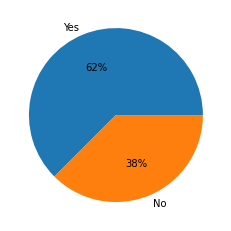

In [661]:
print(dataframe_with_results['Haben Sie zuvor Beethoven: Ode an die Freude gehört?'].value_counts())
plt.pie(dataframe_with_results['Haben Sie zuvor Beethoven: Ode an die Freude gehört?'].value_counts(), labels=['Yes', 'No'],autopct='%1.0f%%')
plt.show()

# Explore Outcome of Learning Sessions

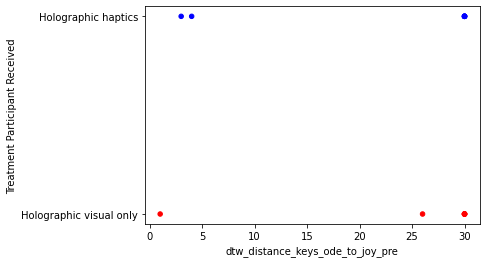

In [662]:

colors_for_treatments = {'Holographic visual only':'red',
      'Holographic haptics':'blue',
      'Passive Haptic Learning':'green'}

fig, ax = plt.subplots()

reg_data = dataframe_with_results
reg_data.plot(x='dtw_distance_keys_ode_to_joy_pre',
              y='Treatment Participant Received',
kind='scatter',
ax=ax,
c=[colors_for_treatments[x] for x in reg_data['Treatment Participant Received']])
plt.show()

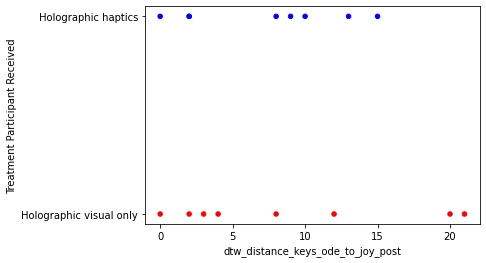

In [663]:

fig, ax = plt.subplots()

reg_data = dataframe_with_results
reg_data.plot(x='dtw_distance_keys_ode_to_joy_post',
              y='Treatment Participant Received',
kind='scatter',
ax=ax,
c=[colors_for_treatments[x] for x in reg_data['Treatment Participant Received']])
plt.show()

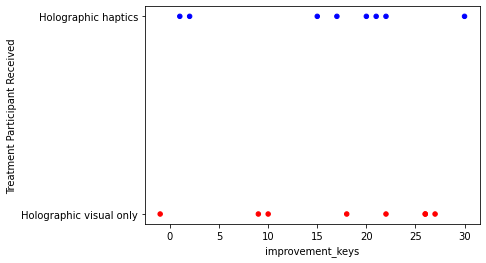

In [664]:
dataframe_with_results['improvement_keys'] = dataframe_with_results['dtw_distance_keys_ode_to_joy_pre']-dataframe_with_results['dtw_distance_keys_ode_to_joy_post']


fig, ax = plt.subplots()

reg_data = dataframe_with_results
reg_data.plot(x='improvement_keys',
              y='Treatment Participant Received',
kind='scatter',
ax=ax,
c=[colors_for_treatments[x] for x in reg_data['Treatment Participant Received']])
plt.show()

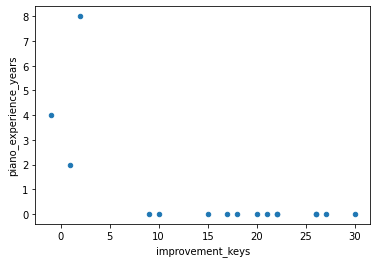

In [665]:
fig, ax = plt.subplots()

reg_data = dataframe_with_results
reg_data.plot(x='improvement_keys',
              y='piano_experience_years',
kind='scatter',
ax=ax)


plt.show()

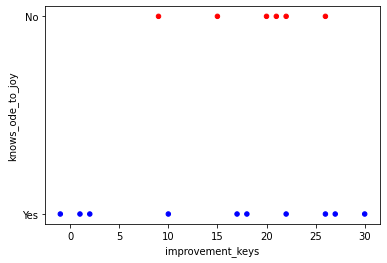

In [666]:
colors_yes_no = {'Yes':'blue','No':'red'}
fig, ax = plt.subplots()

reg_data = dataframe_with_results
reg_data.plot(x='improvement_keys',
              y='knows_ode_to_joy',
kind='scatter',
ax=ax,
c= [colors_yes_no[x] for x in reg_data['knows_ode_to_joy']])
plt.show()

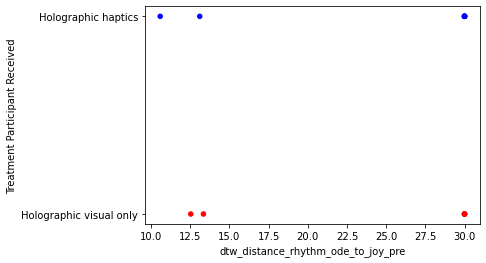

In [667]:
fig, ax = plt.subplots()

reg_data = dataframe_with_results
reg_data.plot(x='dtw_distance_rhythm_ode_to_joy_pre',
              y='Treatment Participant Received',
kind='scatter',
ax=ax,
c=[colors_for_treatments[x] for x in reg_data['Treatment Participant Received']])
plt.show()

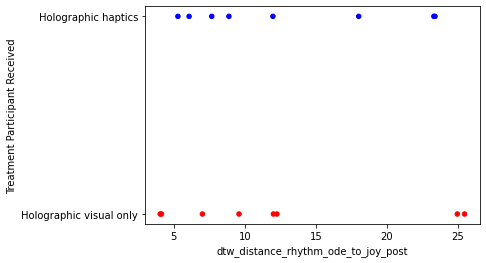

In [668]:
fig, ax = plt.subplots()

reg_data = dataframe_with_results
reg_data.plot(x='dtw_distance_rhythm_ode_to_joy_post',
              y='Treatment Participant Received',
kind='scatter',
ax=ax,
c=[colors_for_treatments[x] for x in reg_data['Treatment Participant Received']])
plt.show()

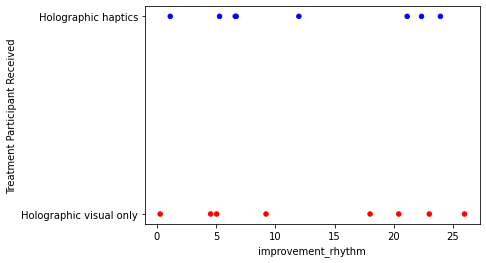

In [669]:
dataframe_with_results['improvement_rhythm'] = dataframe_with_results['dtw_distance_rhythm_ode_to_joy_pre']-dataframe_with_results['dtw_distance_rhythm_ode_to_joy_post']


fig, ax = plt.subplots()

reg_data = dataframe_with_results
reg_data.plot(x='improvement_rhythm',
              y='Treatment Participant Received',
kind='scatter',
ax=ax,
c=[colors_for_treatments[x] for x in reg_data['Treatment Participant Received']])
plt.show()

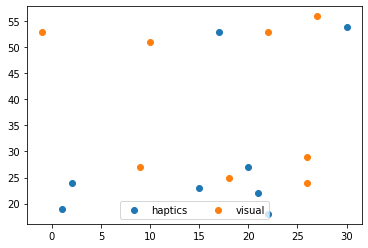

In [670]:
fig, ax = plt.subplots()
haptics_results = dataframe_with_results.loc[dataframe_with_results['Treatment Participant Received']=='Holographic haptics']
plt.scatter(haptics_results['improvement_keys'],haptics_results['age'])
visual_results = dataframe_with_results.loc[dataframe_with_results['Treatment Participant Received']=='Holographic visual only']
plt.scatter(visual_results['improvement_keys'], visual_results['age'])

ax.legend(["haptics" , "visual"], ncol = 2 , loc = "lower center")
plt.show()

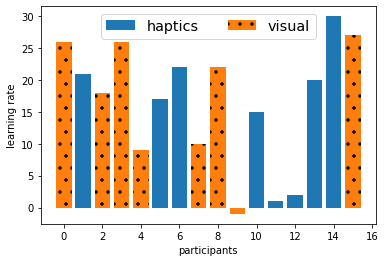

In [671]:


fig, ax = plt.subplots()

plt.bar(haptics_results.index, haptics_results['improvement_keys'])
plt.bar(visual_results.index,visual_results['improvement_keys'], hatch= '.')

ax.legend(["haptics" , "visual"] , ncol = 2, loc = "upper center", fontsize="x-large")

plt.xlabel('participants')
plt.ylabel('learning rate')
plt.savefig('./figures/learning_rate_keys_bar_chart.pdf',dpi=300, bbox_inches = "tight")
plt.show()


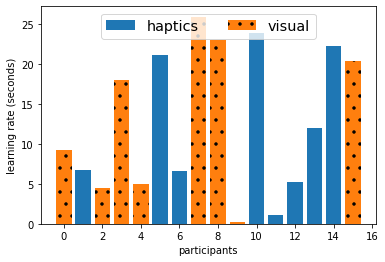

In [672]:
fig, ax = plt.subplots()

plt.bar(haptics_results.index, haptics_results['improvement_rhythm'])
plt.bar(visual_results.index,visual_results['improvement_rhythm'], hatch= '.')

ax.legend( ["haptics" , "visual"] , ncol=2, loc = "upper center", fontsize="x-large")

plt.xlabel('participants')
plt.ylabel('learning rate (seconds)')
plt.savefig('./figures/learning_rate_rhythm_bar_chart.pdf',dpi=300, bbox_inches = "tight")
plt.show()

Statistical analysis

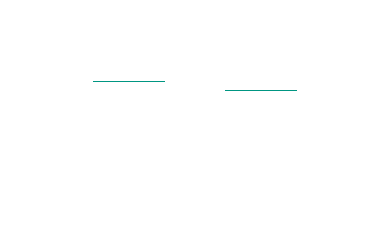

ShapiroResult(statistic=0.9046773910522461, pvalue=0.3180989921092987)
ShapiroResult(statistic=0.8862871527671814, pvalue=0.216042622923851)
LeveneResult(statistic=0.09631391200951249, pvalue=0.760870718175692)


In [673]:
explorative_statistic_for_t_test(dataframe_with_results, 'improvement_keys')

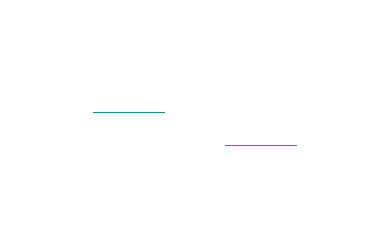

ShapiroResult(statistic=0.8796854019165039, pvalue=0.1870288997888565)
ShapiroResult(statistic=0.9169264435768127, pvalue=0.4054237902164459)
LeveneResult(statistic=0.31687196974015186, pvalue=0.5823967517305182)


In [674]:
explorative_statistic_for_t_test(dataframe_with_results, 'improvement_rhythm')


# Performance of learning enviroment

Paired T-Tests show that the error of key presses and rhythm are significntly reduced after the learning session for both the haptic learning group and the visual learning group.

In [675]:
visual_only_keys_post = dataframe_with_results.loc[dataframe_with_results['Treatment Participant Received']=='Holographic visual only']['dtw_distance_keys_ode_to_joy_post']
visual_only_keys_pre = dataframe_with_results.loc[dataframe_with_results['Treatment Participant Received']=='Holographic visual only']['dtw_distance_keys_ode_to_joy_pre']
print(ttest_rel(visual_only_keys_post, visual_only_keys_pre, alternative='less'))
print("cohens d={0:.3f}".format((visual_only_keys_pre.mean() - visual_only_keys_post.mean())/ (visual_only_keys_pre - visual_only_keys_post).std()))

haptic_keys_post = dataframe_with_results.loc[dataframe_with_results['Treatment Participant Received']=='Holographic haptics']['dtw_distance_keys_ode_to_joy_post']
haptic_keys_pre = dataframe_with_results.loc[dataframe_with_results['Treatment Participant Received']=='Holographic haptics']['dtw_distance_keys_ode_to_joy_pre']
print(ttest_rel(haptic_keys_post, haptic_keys_pre, alternative='less'))
print("cohens d={0:.3f}".format((haptic_keys_pre.mean() - haptic_keys_post.mean())/ (haptic_keys_pre - haptic_keys_post).std()))

Ttest_relResult(statistic=-4.759847435754342, pvalue=0.001029913760010994)
cohens d=1.683
Ttest_relResult(statistic=-4.538469031449403, pvalue=0.0013362847447408012)
cohens d=1.605


In [676]:
visual_only_rhythm_post = dataframe_with_results.loc[dataframe_with_results['Treatment Participant Received']=='Holographic visual only']['dtw_distance_rhythm_ode_to_joy_post']
visual_only_rhythm_pre = dataframe_with_results.loc[dataframe_with_results['Treatment Participant Received']=='Holographic visual only']['dtw_distance_rhythm_ode_to_joy_pre']
print(ttest_rel(visual_only_rhythm_post, visual_only_rhythm_pre, alternative='less'))
print("cohens d={0:.3f}".format((visual_only_rhythm_pre.mean() - visual_only_rhythm_post.mean())/ (visual_only_rhythm_pre - visual_only_rhythm_post).std()))

haptic_rhythm_post = dataframe_with_results.loc[dataframe_with_results['Treatment Participant Received']=='Holographic haptics']['dtw_distance_rhythm_ode_to_joy_post']
haptic_rhythm_pre = dataframe_with_results.loc[dataframe_with_results['Treatment Participant Received']=='Holographic haptics']['dtw_distance_rhythm_ode_to_joy_pre']
print(ttest_rel(haptic_rhythm_post, haptic_rhythm_pre, alternative='less'))
print("cohens d={0:.3f}".format((haptic_keys_pre.mean() - haptic_rhythm_post.mean())/ (haptic_keys_pre - haptic_rhythm_post).std()))



Ttest_relResult(statistic=-3.8817253118921924, pvalue=0.003019761228215826)
cohens d=1.372
Ttest_relResult(statistic=-3.9487641613707325, pvalue=0.002770386415144579)
cohens d=0.870


Unpaired T-Test to measure performance of learn environment shows that the performance of the haptic learning group is not significantly different from the performance of the visual learning group for both key sequence and rhythm.

In [677]:
ttest_ind(dataframe_with_results.loc[dataframe_with_results['Treatment Participant Received']=='Holographic haptics']['improvement_keys'], dataframe_with_results.loc[dataframe_with_results['Treatment Participant Received']=='Holographic visual only']['improvement_keys'])

Ttest_indResult(statistic=-0.22334107359461292, pvalue=0.8264960429852166)

In [678]:
ttest_ind(dataframe_with_results.loc[dataframe_with_results['Treatment Participant Received']=='Holographic haptics']['improvement_rhythm'], dataframe_with_results.loc[dataframe_with_results['Treatment Participant Received']=='Holographic visual only']['improvement_rhythm'])

Ttest_indResult(statistic=-0.1971062189168852, pvalue=0.8465773304058825)

In [679]:
def show_mean_percentage_change(starting_value, final_value):
    starting_value_mean = starting_value.mean()
    final_value_mean = final_value.mean()
    percentage_change = (final_value_mean - starting_value_mean)/abs(starting_value_mean)
    if(percentage_change >= 0):
        print(f"{percentage_change * 100}% increase.")
    else:
        print(f"{abs(percentage_change * 100)}% decrease.")

print("visual key change percentage:")
show_mean_percentage_change(visual_only_keys_pre,visual_only_keys_post)
print("haptic key change percentage:")
show_mean_percentage_change(haptic_keys_pre,haptic_keys_post)

print("visual rhythm change percentage:")
show_mean_percentage_change(visual_only_rhythm_pre,visual_only_rhythm_post)
print("haptic rhythm change percentage:")
show_mean_percentage_change(haptic_rhythm_pre,haptic_rhythm_post)




visual key change percentage:
66.18357487922705% decrease.
haptic key change percentage:
68.44919786096256% decrease.
visual rhythm change percentage:
51.70228006788092% decrease.
haptic rhythm change percentage:
48.66070813482437% decrease.


# Performance Rhythm

# NASA TLX for cognitive load

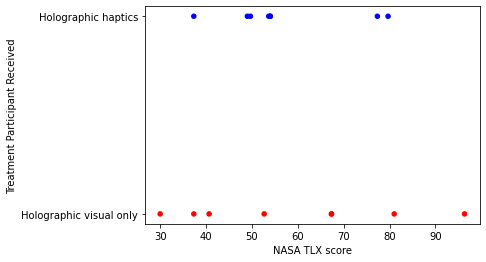

In [680]:

fig, ax = plt.subplots()

reg_data = dataframe_with_results
reg_data.plot(x='NASA TLX score',
              y='Treatment Participant Received',
kind='scatter',
ax=ax,
c=[colors_for_treatments[x] for x in reg_data['Treatment Participant Received']])
plt.show()

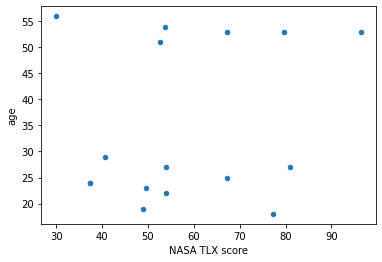

In [681]:
fig, ax = plt.subplots()

reg_data = dataframe_with_results
reg_data.plot(x='NASA TLX score',
              y='age',
kind='scatter',
ax=ax)
plt.show()

In [682]:
print("mean TLX haptic = {0:.3f}".format(haptics_results['NASA TLX score'].mean()))
print("mean TLX visual = {0:.3f}".format(visual_results['NASA TLX score'].mean()))

mean TLX haptic = 56.833
mean TLX visual = 59.083


In [683]:
print("median TLX haptic = {0:.3f}".format(haptics_results['NASA TLX score'].median()))
print("median TLX visual = {0:.3f}".format(visual_results['NASA TLX score'].median()))

median TLX haptic = 53.833
median TLX visual = 60.000


In [684]:
print("min TLX haptic = {0:.3f}".format(haptics_results['NASA TLX score'].min()))
print("min TLX visual = {0:.3f}".format(visual_results['NASA TLX score'].min()))
print("max TLX haptic = {0:.3f}".format(haptics_results['NASA TLX score'].max()))
print("max TLX visual = {0:.3f}".format(visual_results['NASA TLX score'].max()))

min TLX haptic = 37.333
min TLX visual = 30.000
max TLX haptic = 79.667
max TLX visual = 96.333


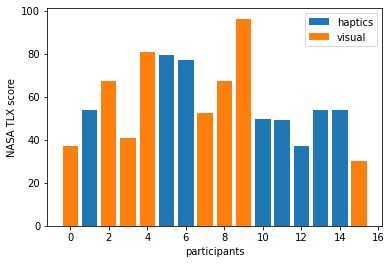

In [45]:


fig, ax = plt.subplots()
plt.bar(haptics_results.index,haptics_results['NASA TLX score'])
plt.bar(visual_results.index, visual_results['NASA TLX score'])

ax.legend(["haptics" , "visual"] , loc = "upper right")

plt.xlabel('participants')
plt.ylabel('NASA TLX score')
plt.show()

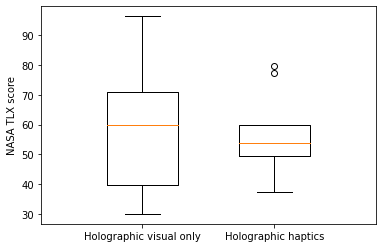

ShapiroResult(statistic=0.855698823928833, pvalue=0.10874921083450317)
ShapiroResult(statistic=0.9542309045791626, pvalue=0.7537043690681458)
LeveneResult(statistic=2.685873909142813, pvalue=0.12351139003127178)


In [46]:
explorative_statistic_for_t_test(dataframe_with_results, 'NASA TLX score')

Analysing TLX score with t-test shows that the TLX score is not significantly different between the group who received visual learning and the group who received haptic learning.

In [47]:
ttest_ind(dataframe_with_results.loc[dataframe_with_results['Treatment Participant Received']=='Holographic haptics']['NASA TLX score'], dataframe_with_results.loc[dataframe_with_results['Treatment Participant Received']=='Holographic visual only']['NASA TLX score'])

Ttest_indResult(statistic=-0.23430726299513158, pvalue=0.8181383661961126)

## Plot Likert Scale Questions


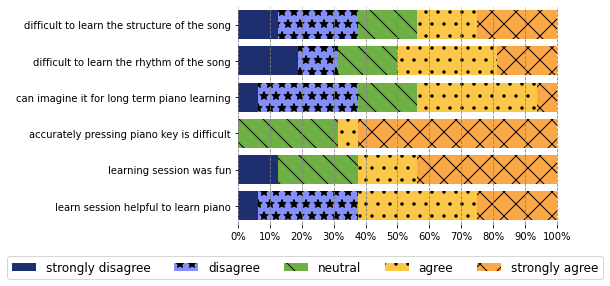

In [48]:


labels =likert_en
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748', '#FAA748']
hatches = ['','*', '\\', '.', 'x']



plot_stackedbar_chart(subjective_questions_data_frame, labels, colors)

plt.savefig('./figures/subjective_stacked_bar_chart.pdf',dpi=300, bbox_inches = "tight")
plt.show()